In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#import database and show the 5 first ligne
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
# Résumé statistique des colonnes numériques
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [5]:
# Information sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [7]:
# Afficher les valeurs uniques dans une colonne
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [8]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())


Category    0
Resume      0
dtype: int64


In [9]:
df['Category'].value_counts()


,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


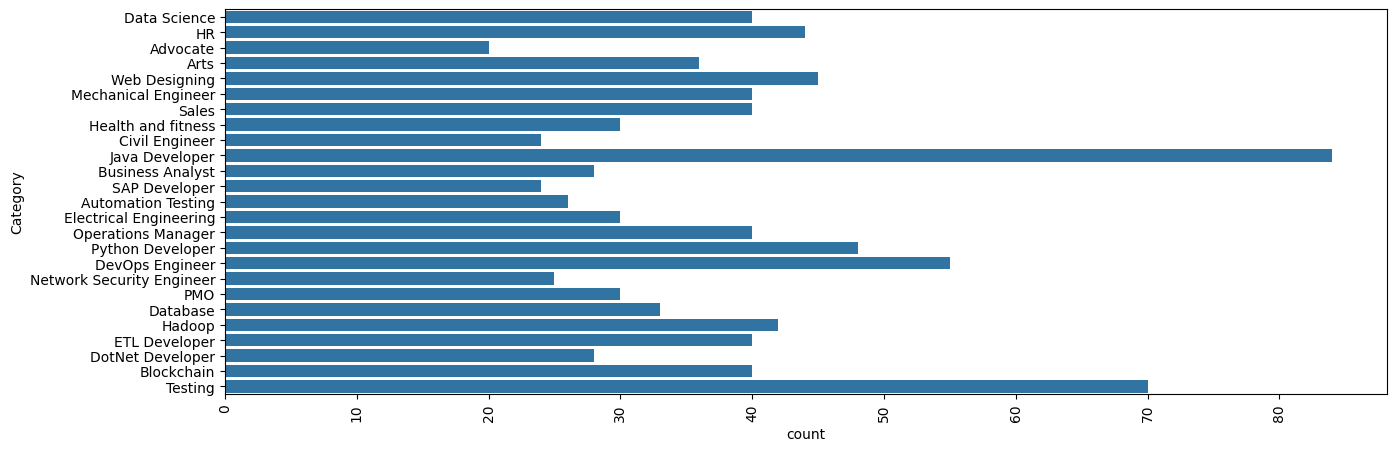

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

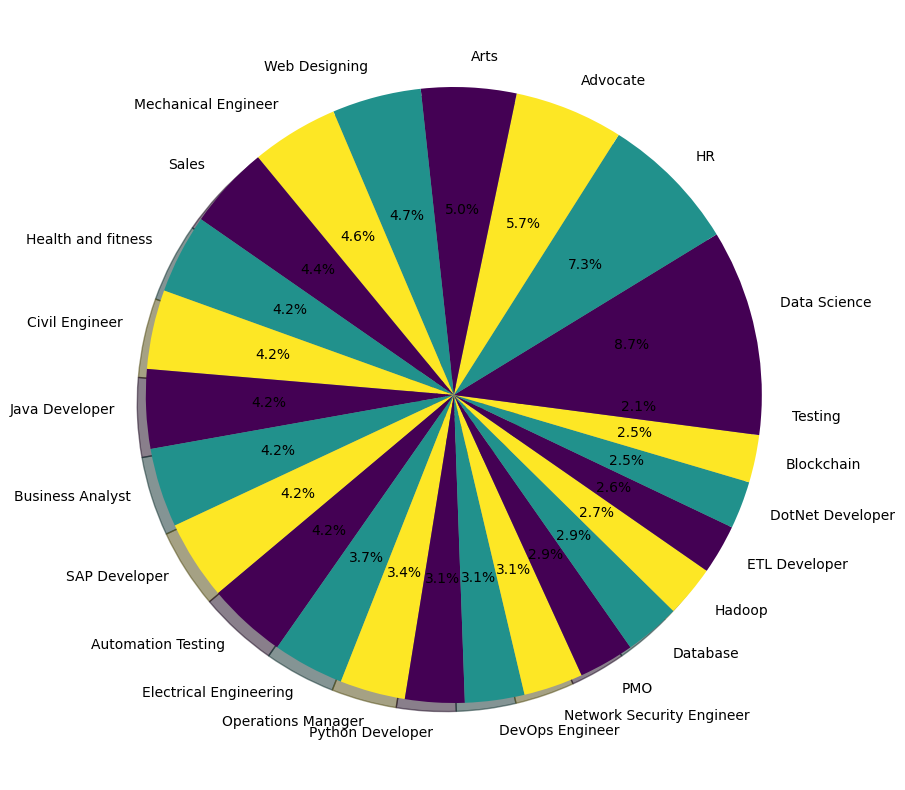

In [14]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.viridis(np.linspace(0,1,3)))
plt.show()

In [18]:
#show an exemple
print(df['Resume'][14])
print('*************************')
print(df['Category'][14])

Education Details 
 MCA   YMCAUST,  Faridabad,  Haryana
Data Science internship 


Skill Details 
Data Structure- Exprience - Less than 1 year months
C- Exprience - Less than 1 year months
Data Analysis- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
Core Java- Exprience - Less than 1 year months
Database Management- Exprience - Less than 1 year monthsCompany Details 
company - Itechpower
description - 
*************************
Data Science


In [19]:
import re

def cleanResume(txt):
    # Combiner plusieurs remplacements en une seule expression régulière
    cleanText = re.sub(
        r'http\S+\s|RT|cc|#\S+\s|@\S+|[%s]|[^\x00-\x7f]|\s+' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),
        ' ',
        txt
    )

    # Supprimer les espaces multiples générés par les remplacements
    cleanText = ' '.join(cleanText.split())

    return cleanText


In [20]:
cleanResume(df['Resume'][14])

'Education Details MCA YMCAUST Faridabad Haryana Data Science internship Skill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description'

In [22]:
#applied the focntion on the dataset
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
df['Resume'][4]

'Education Details MCA YMCAUST Faridabad Haryana Data Science internship Skill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description'

In [23]:
# transforme les étiquettes (ou labels) catégoriques en valeurs numériques
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Category'])
df['Category'] = encoder.transform(df['Category'])

In [24]:
#tester
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

    the category :   
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",

In [25]:
#convertit une collection de documents de texte brut en une matrice de caractéristiques où chaque mot est pondéré par sa fréquence inverse de document (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000,stop_words='english')
x=tfidf.fit_transform(df['Resume']).toarray()


y = df['Category']

In [27]:
x.shape

(962, 1000)

In [28]:
y.shape

(962,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
X_train.shape


(769, 1000)

In [31]:
X_test.shape


(193, 1000)

In [32]:
#OneVsRestClassifier est une stratégie de classification multi-classe qui transforme un problème de classification multi-classe en plusieurs problèmes de classification binaire.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())

In [34]:
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calcul de la précision
print(f"Accuracy: {accuracy_score(y_test, ypred):.2f}")

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, ypred)

# Affichage de la matrice de confusion
print("Confusion Matrix:")
print(cm)


# Affichage du rapport de classification pour des métriques supplémentaires
print("Classification Report:")
print(classification_report(y_test, ypred))

Accuracy: 0.98
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0

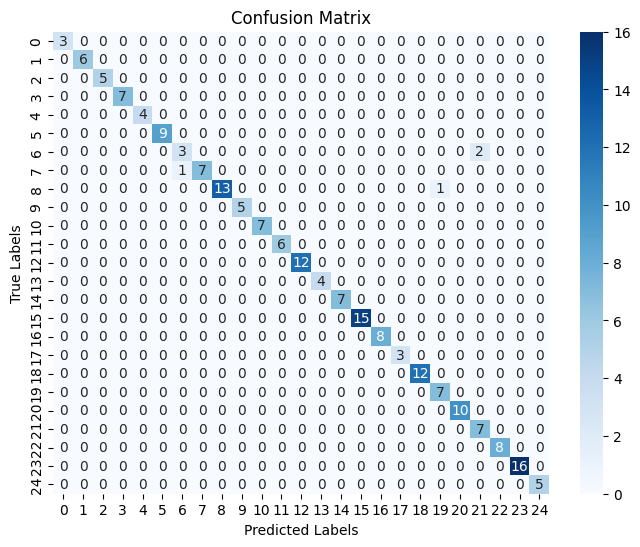

In [37]:
# Visualisation de la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [41]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb')) # le model qui convertir mot en matrice
pickle.dump(clf, open('clf.pkl', 'wb'))   # le model de classification

In [40]:
resume_exemple="""John Doe
Civil Engineer
johndoe@email.com | [Phone Number] | [City, State]

Summary
Detail-oriented and highly skilled Civil Engineer with over 5 years of experience in planning, designing, and overseeing construction and maintenance of various infrastructure projects, including roads, bridges, and buildings. Adept at working in fast-paced environments and leading cross-functional teams to deliver projects on time and within budget. Strong expertise in structural analysis, project management, and environmental sustainability. Committed to ensuring safety, compliance, and efficiency in all phases of construction.

Experience
ABC Construction Company, City, State
Civil Engineer | June 2019 – Present

Led the design and construction of a $10 million highway expansion project, successfully completing it 3 months ahead of schedule and 5% under budget.
Managed a team of 15 engineers and technicians in the development of a new residential complex, ensuring adherence to all local building codes and safety regulations.
Conducted site inspections and supervised on-site operations to ensure structural integrity and compliance with design specifications.
Collaborated with architects, urban planners, and government officials to secure permits and meet zoning requirements for various projects.
Implemented sustainable building practices, reducing environmental impact by 20% through innovative material selection and waste management.
XYZ Engineering Solutions, City, State
Junior Civil Engineer | July 2016 – May 2019

Assisted in the design and analysis of structural components for commercial and industrial buildings, ensuring compliance with all relevant standards and codes.
Developed detailed construction plans and blueprints using AutoCAD and Revit, contributing to the successful completion of over 50 projects.
Conducted feasibility studies and cost estimates for proposed infrastructure projects, aiding in client decision-making processes.
Coordinated with contractors and suppliers to ensure timely delivery of materials and adherence to project timelines.
Participated in site surveys and environmental assessments, contributing to the planning and execution of sustainable development initiatives.
Education
Bachelor of Science in Civil Engineering
University of Engineering, City, State | Graduated May 2016

Relevant Coursework: Structural Analysis, Transportation Engineering, Environmental Engineering, Construction Management
Skills
Structural Analysis & Design
Project Management
AutoCAD & Revit
Environmental Sustainability
Site Inspection & Supervision
Cost Estimation & Budgeting
Team Leadership & Collaboration
Permit & Zoning Compliance"""

In [42]:
import pickle

# Load the trained classifier
clf = pickle.load(open('/content/clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(resume_exemple)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Civil Engineer
5
